In [1]:
import matplotlib.pylab as plt
import numpy as np
import random

In [2]:
class Ubicacion(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def muevase(self,deltaX,deltaY):
        return Ubicacion(self.x+deltaX,self.y+deltaY)
    def Donde_esta_x(self):
        return self.x
    def Donde_esta_y(self):
        return self.y
    def Distancia_desde(self,otro):
        otro_x=otro.x
        otro_y=otro.y
        Distancia_en_x=self.x-otro_x
        Distancia_en_y=self.y-otro_y
        return (Distancia_en_x**2 + Distancia_en_y**2)**0.5
    def __str__(self):
        return "<"+str(self.x)+", "+str(self.y)+">"

In [3]:
class Campo(object):
    def __init__(self):
        self.borrachos={}
    def Agregue_borracho(self,borracho,loc):
        if borracho in self.borrachos:
            raise ValueError("Hay dos borrachos iguales")
        else:
            self.borrachos[borracho]=loc
    def Tener_loc(self,borracho):
        if borracho not in self.borrachos:
            raise ValueError("El borracho no esta en el campo")
        return self.borrachos[borracho]
    def Mueva_el_borracho(self,ebrio):
        if ebrio not in self.borrachos:
            raise ValueError("El borracho no esta en el campo")
        Distancia_x,Distancia_y=ebrio.Avance()
        Loc_actual=self.borrachos[ebrio]
        self.borrachos[ebrio]= Loc_actual.muevase(Distancia_x,Distancia_y)
        

In [4]:
class Borracho(object):
    def __init__(self,nombre=None):
        self.nombre=nombre
    def __str__(self):
        return "Este man se llama " + self.nombre

In [5]:
class Tipico_Borracho(Borracho):
    def Avance(self):
        posibilidades=[(0.0,1.0),(0.0,-1.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(posibilidades)
class Borracho_con_frio(Borracho):
    def Avance(self):
        posibilidades=[(0.0,0.9),(0.0,-1.1),(1.0,0.0),(-1.0,0.0)]
        return random.choice(posibilidades)

In [6]:
def caminata(campo,ebrio,Num_pasos):
    inicio = campo.Tener_loc(ebrio)
    for pasos in range(Num_pasos):
        campo.Mueva_el_borracho(ebrio)
    return inicio.Distancia_desde(campo.Tener_loc(ebrio))

In [7]:
def simular_caminatas(Num_pasos,Num_intentos,tipo_de_borracho):
    Homer = tipo_de_borracho()
    origen = Ubicacion(0,0)
    distancias = []
    for t in range(Num_intentos):
        c=Campo()
        c.Agregue_borracho(Homer,origen)
        distancias.append(round(caminata(c,Homer,Num_pasos),1))
    return distancias   

In [8]:
def Testear_Borracho(longitud_caminata,Num_intentos,tipo_de_borracho):
    for num_pasos in longitud_caminata:
        distancias = simular_caminatas(num_pasos,Num_intentos,tipo_de_borracho)
        print(tipo_de_borracho.__name__,"Caminata aleatoria de",num_pasos,"pasos")
        print("Promedio =",round(sum(distancias)/len(distancias),4))
        print("Maximo =",max(distancias),"Minimo =",min(distancias))

In [9]:
def Simular_todos(tipos_borrachos,Longitud_caminata,Num_intentos):
    for tipo_borracho in tipos_borrachos:
        Testear_Borracho(Longitud_caminata,Num_intentos,tipo_borracho)

In [10]:
random.seed(0)
Testear_Borracho((10,100,1000,10000),100,Tipico_Borracho)

Tipico_Borracho Caminata aleatoria de 10 pasos
Promedio = 2.863
Maximo = 7.2 Minimo = 0.0
Tipico_Borracho Caminata aleatoria de 100 pasos
Promedio = 8.296
Maximo = 21.6 Minimo = 1.4
Tipico_Borracho Caminata aleatoria de 1000 pasos
Promedio = 27.297
Maximo = 66.3 Minimo = 4.2
Tipico_Borracho Caminata aleatoria de 10000 pasos
Promedio = 89.241
Maximo = 226.5 Minimo = 10.0


In [11]:
random.seed(0)
Simular_todos((Tipico_Borracho,Borracho_con_frio),(1,10,100,1000,10000),100)

Tipico_Borracho Caminata aleatoria de 1 pasos
Promedio = 1.0
Maximo = 1.0 Minimo = 1.0
Tipico_Borracho Caminata aleatoria de 10 pasos
Promedio = 2.948
Maximo = 7.2 Minimo = 0.0
Tipico_Borracho Caminata aleatoria de 100 pasos
Promedio = 8.453
Maximo = 21.6 Minimo = 1.4
Tipico_Borracho Caminata aleatoria de 1000 pasos
Promedio = 27.138
Maximo = 72.8 Minimo = 1.4
Tipico_Borracho Caminata aleatoria de 10000 pasos
Promedio = 90.661
Maximo = 222.9 Minimo = 5.1
Borracho_con_frio Caminata aleatoria de 1 pasos
Promedio = 0.996
Maximo = 1.1 Minimo = 0.9
Borracho_con_frio Caminata aleatoria de 10 pasos
Promedio = 2.788
Maximo = 7.1 Minimo = 0.2
Borracho_con_frio Caminata aleatoria de 100 pasos
Promedio = 9.602
Maximo = 22.9 Minimo = 0.4
Borracho_con_frio Caminata aleatoria de 1000 pasos
Promedio = 53.525
Maximo = 108.3 Minimo = 7.3
Borracho_con_frio Caminata aleatoria de 10000 pasos
Promedio = 495.128
Maximo = 654.6 Minimo = 323.9


In [12]:
class styleInterator(object):
    def __init__(self,styles):
        self.index = 0
        self.styles = styles
    def nextStyle(self):
        result=self.styles[self.index]
        if self.index == len(self.styles)-1:
            self.index=0
        else:
            self.index +=1
        return result

In [13]:
def simular_borracho(Num_intentos, tipo_borracho,Longitudes_caminata):
    Distancia_promedio = []
    for Num_pasos in Longitudes_caminata:
        print("empezando simulacion de",Num_pasos, "pasos")
        intentos = simular_caminatas(Num_pasos,Num_intentos,tipo_borracho)
        promedio= sum(intentos)/len(intentos)
        Distancia_promedio.append(promedio)
    return Distancia_promedio

In [14]:
def Simular_todos_plot(tipos_borrachos,Longitud_caminata,Num_intentos):
    styleChoice=styleInterator(("m-","b--","g-."))
    for tipo_borracho in tipos_borrachos:
        curStyle=styleChoice.nextStyle()
        print("Empezando simulacion de",tipo_borracho.__name__)
        promedios=simular_borracho(Num_intentos,tipo_borracho,Longitud_caminata)
        plt.plot(Longitud_caminata,promedios,curStyle,label=tipo_borracho.__name__)
    plt.title("Distancia promedio desde el origen ("+str(Num_intentos)+" intentos)")
    plt.xlabel("Numero de pasos")
    plt.ylabel("Distancia del origen")
    plt.legend(loc="best")
plt.show()        

Empezando simulacion de Tipico_Borracho
empezando simulacion de 10 pasos
empezando simulacion de 100 pasos
empezando simulacion de 1000 pasos
empezando simulacion de 10000 pasos
Empezando simulacion de Borracho_con_frio
empezando simulacion de 10 pasos
empezando simulacion de 100 pasos
empezando simulacion de 1000 pasos
empezando simulacion de 10000 pasos


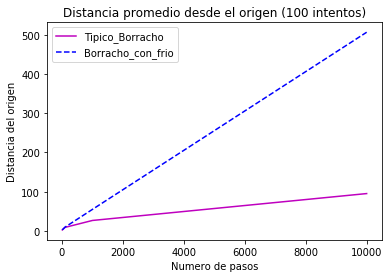

In [15]:
num_pasos=(10,100,1000,10000)
Simular_todos_plot((Tipico_Borracho,Borracho_con_frio),num_pasos,100)

In [16]:
def Tener_posiciones_finales(Num_pasos,Num_intentos,tipo_borracho):
    Locs=[]
    borracho=tipo_borracho()
    for t in range(Num_intentos):
        c=Campo()
        c.Agregue_borracho(borracho,Ubicacion(0,0))
        for s in range(Num_pasos):
            c.Mueva_el_borracho(borracho)
        Locs.append(c.Tener_loc(borracho))
    return Locs

In [17]:
def plotLocs(tipos_borrachos,Num_pasos, Num_intentos):
    styleChoice = styleInterator(("k+","r^","mo"))
    for tipo_borracho in tipos_borrachos:
        locs=Tener_posiciones_finales(Num_pasos,Num_intentos,tipo_borracho)
        xVals,yVals=[],[]
        for loc in locs:
            xVals.append(loc.Donde_esta_x())
            yVals.append(loc.Donde_esta_y())
        xVals = np.array(xVals)
        yVals = np.array(yVals)
        meanX=np.sum(np.abs(xVals))/len(xVals)
        meanY=np.sum(np.abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals,yVals,curStyle,label=tipo_borracho.__name__+" promedio Abs distancia =<"+str(round(meanX,3))+","+str(round(meanY,3))+">")
    plt.title("Ubicaciion al final de la caminata "+str(Num_pasos)+" pasos")
    plt.ylim(-1000,1000)
    plt.xlim(-1000,1000)
    plt.xlabel("Pasos este oeste del origen")
    plt.ylabel("Pasos norte sur del origen")
    plt.legend(loc="upper left")     

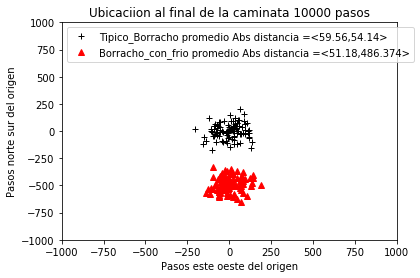

In [18]:
random.seed(0)
plotLocs((Tipico_Borracho,Borracho_con_frio),10000,100)

In [25]:
class Campo_raro(Campo):
    def __init__(self, numAgujeros = 1000, Rango_x=10, Rango_y=10):
        Campo.__init__(self)
        self.Agujero_gusano = {}
        for Ag in range(numAgujeros):
            x= random.randint(-Rango_x,Rango_x)
            y= random.randint(-Rango_y,Rango_y)
            nuevo_x = random.randint(-Rango_x,Rango_x)
            nuevo_y = random.randint(-Rango_y,Rango_y)
            Nueva_ubicacion = Ubicacion(nuevo_x,nuevo_y)
            self.Agujero_gusano[(x,y)]=Nueva_ubicacion
    def Mueva_el_borracho(self,borracho):
        Campo.Mueva_el_borracho(self,borracho)
        x=self.borrachos[borracho].Donde_esta_x()
        y=self.borrachos[borracho].Donde_esta_y()
        if (x,y) in self.Agujero_gusano:
            self.borrachos[borracho]=self.Agujero_gusano[(x,y)]

In [28]:
def Dibujar_caminata(Tipo_campo,num_pasos):
    styleChoice= styleInterator(("b+","r^","ko"))
    for campo in Tipo_campo:
        ebrio = Tipico_Borracho()
        #ebrio = Borracho_con_frio()
        c = campo()
        c.Agregue_borracho(ebrio,Ubicacion(0,0))
        Locs=[]
        for paso in range(num_pasos):
            c.Mueva_el_borracho(ebrio)
            Locs.append(c.Tener_loc(ebrio))
        xVals, yVals = [],[]
        for loc in Locs:
            xVals.append(loc.Donde_esta_x())
            yVals.append(loc.Donde_esta_y())
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals,yVals,curStyle,label=campo.__name__)
    plt.title("Lugares visitados en la caminata de "+str(num_pasos)+" pasos")
    plt.xlabel("Pasos Este/Oeste desde el origen")
    plt.ylabel("Pasos Norte/sur del origen")
    plt.legend(loc="best")

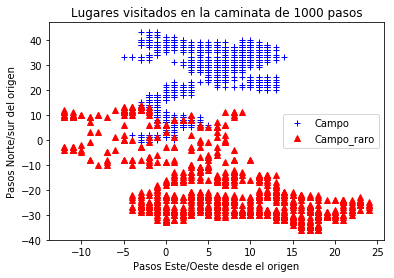

In [30]:
Dibujar_caminata((Campo, Campo_raro),1000)